#3

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import unravel_index

#4

###To keep from calling plt.show every time

In [74]:
%matplotlib inline

#5

In [75]:
###Read in gdp Data

In [76]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv", nrows=6868)

In [ ]:
#make sure there is ONLY values in that column! ... or whatever datatype

In [ ]:
#all columns have to be the same datatype

In [77]:
#print((gdp_df[0:7]))

#6

In [78]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)

In [79]:
print((internet_df[0:7]))

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN
6     Afghanistan  2008  1.840000              NaN


#98

In [8]:
gdp_df.shape

(6868, 4)

In [106]:
internet_df.shape

(4495, 4)

In [ ]:
#or .info

#6 - Repeat

In [10]:
gdp_df.dtypes

In [105]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

#99

In [108]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [107]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#7 and 8

In [14]:
gdpnew_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [ ]:
#you can rename using .columns ... it renames as long as you know the number of columns, etc.

In [15]:
#inplace=True allows for reasigning ... otherwise drop('ldfkj',1)

In [16]:
gdpnew_df.drop('Value Footnotes', axis=1, inplace=True)

In [17]:
print(gdpnew_df[0:7])

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398
1  Afghanistan  2018     2033.779002
2  Afghanistan  2017     2058.383832
3  Afghanistan  2016     2057.062164
4  Afghanistan  2015     2068.265904
5  Afghanistan  2014     2102.385234
6  Afghanistan  2013     2116.465454


#7 and 9

In [18]:
internetnew_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [19]:
internetnew_df.drop('Value Footnotes', axis=1, inplace=True)

In [ ]:
#maybe use .pop

In [20]:
print(internetnew_df[0:7])

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000
5  Afghanistan  2009            3.550000
6  Afghanistan  2008            1.840000


#10 Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [21]:
gdp_and_internet_use = pd.merge(gdpnew_df, internetnew_df, on=['Country', 'Year'], how='outer')

In [22]:
gdp_and_internet_use.dtypes

Country                object
Year                    int64
GDP_Per_Capita        float64
Internet_Users_Pct    float64
dtype: object

In [23]:
gdp_and_internet_use.shape

(7905, 4)

#11 Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [24]:
print((gdp_and_internet_use[0:5]))

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2019     2065.036398                 NaN
1  Afghanistan  2018     2033.779002                 NaN
2  Afghanistan  2017     2058.383832                 NaN
3  Afghanistan  2016     2057.062164                 NaN
4  Afghanistan  2015     2068.265904                 NaN


#12 Look at the last five rows to make sure the data is clean and as expected.

In [25]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


In [ ]:
# df1 = df[df.country == 'Zimbabwe'] will list all these

In [26]:
#sorting data

In [27]:
gdp_and_internet_use.sort_values(by = ['Country', 'Year'], axis=0, ascending=[True, True], inplace=True,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

In [28]:
print((gdp_and_internet_use[0:5]))

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  1990             NaN            0.000000
1  Afghanistan  2001             NaN            0.004723
2  Afghanistan  2002     1189.784878            0.004561
3  Afghanistan  2003     1235.810063            0.087891
4  Afghanistan  2004     1200.278256            0.105809


In [29]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Zimbabwe,2015,2958.209004,NaN
7901,Zimbabwe,2016,2934.733650,NaN
7902,Zimbabwe,2017,3028.245976,NaN
7903,Zimbabwe,2018,3130.029501,NaN
7904,Zimbabwe,2019,2835.948532,NaN


#13 Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [30]:
year_subset = gdp_and_internet_use[(gdp_and_internet_use["Year"]==2004) | (gdp_and_internet_use["Year"]==2009) | (gdp_and_internet_use["Year"]==2014)]

In [ ]:
#also use .isin ... and use the years as a year subset

In [ ]:
#  and is for meeting ALL criteria ... or for any of criteria

In [31]:
year_subset.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
9,Afghanistan,2009,1758.904043,3.550000
14,Afghanistan,2014,2102.385234,6.390000
34,Albania,2004,7604.838002,2.420388
39,Albania,2009,10346.864199,41.200000


#14 Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [32]:
gdp_web_2004 = year_subset[(year_subset["Year"]==2004)]

In [33]:
gdp_web_2004.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
34,Albania,2004,7604.838002,2.420388
64,Algeria,2004,10058.435939,4.634475
89,Andorra,2004,NaN,26.837954
114,Angola,2004,5593.241537,0.464815


In [34]:
gdp_web_2009 = year_subset[(year_subset["Year"]==2009)]

In [35]:
gdp_web_2009.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1758.904043,3.55
39,Albania,2009,10346.864199,41.20
69,Algeria,2009,10782.361398,11.23
94,Andorra,2009,NaN,78.53
119,Angola,2009,7643.493749,6.00


In [36]:
gdp_web_2014 = year_subset[(year_subset["Year"]==2014)]

In [37]:
gdp_web_2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2102.385234,6.39
44,Albania,2014,11623.866679,60.10
74,Algeria,2014,11512.705405,18.09
99,Andorra,2014,NaN,95.90
124,Angola,2014,8239.828837,21.26


#15 Which country had the highest percentage of internet users in 2014? What was the percentage?

In [38]:
#Array not needed as Pandas is a tablature version of Python array ... using Dataframe

In [39]:
#gdp_web_2014a = np.array(gdp_web_2014)

In [40]:
#max_pct = np.nanmax(gdp_web_2014a[:,3])

In [41]:
print(gdp_web_2014['Internet_Users_Pct'].max())

98.16


In [42]:
#Finding Index of max value

In [43]:
# np.argmax(gdp_web_2014a[:,3]) for an array

In [44]:
print(gdp_web_2014.iloc[:, 3].dropna().idxmax())

3249


In [45]:
gdp_web_2014.loc[3249]

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 3249, dtype: object

In [ ]:
#can also use .nlargest with value of 1

In [ ]:
#index of where the value is max

In [46]:
# gdp_web_2014a[3249:3250,:] for an array

#####    iloc[ ] is used to select rows/ columns by their corresponding labels.
#####    loc[ ] is used to select rows/columns by their indices.
#####   [ ] is used to select columns by their respective names.

#16 Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [47]:
print(gdp_web_2014['Internet_Users_Pct'].min())

0.0


In [48]:
print(gdp_web_2014.iloc[:, 3].dropna().idxmin())

1645


In [49]:
gdp_web_2014.loc[gdp_web_2014.iloc[:, 3].dropna().idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1645, dtype: object

In [50]:
#What if there is more than one country with 0.0?

#17 Repeat for 2004 and 2009

In [51]:
print(gdp_web_2004.iloc[:, 3].dropna().min())

0.0


In [52]:
print(gdp_web_2004.iloc[:, 3].dropna().max())

83.89


##### index inside of loc command

In [53]:
#gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmin()]

In [54]:
#gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmax()]

In [55]:
print(gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmin()],"\n"),
print(gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmax()])

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1636, dtype: object 

Country                     Sweden
Year                          2004
GDP_Per_Capita        44496.023401
Internet_Users_Pct           83.89
Name: 6849, dtype: object


In [56]:
print(gdp_web_2009.loc[gdp_web_2009.iloc[:, 3].dropna().idxmin()],"\n"),
print(gdp_web_2009.loc[gdp_web_2009.iloc[:, 3].dropna().idxmax()])

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1641, dtype: object 

Country                    Iceland
Year                          2009
GDP_Per_Capita        48177.084123
Internet_Users_Pct            93.0
Name: 3244, dtype: object


In [57]:
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 3].dropna().idxmin()],"\n"),
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 3].dropna().idxmax()])

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1645, dtype: object 

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 3249, dtype: object


#18 & 19? Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [58]:
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 2].dropna().idxmax()])

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita            156514.13385
Internet_Users_Pct                 NaN
Name: 4349, dtype: object


#20 Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [59]:
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 2].dropna().idxmin()])

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                      822.610458
Internet_Users_Pct                         NaN
Name: 1182, dtype: object


#21.	Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita  

In [60]:
gdp_web_2004.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
34,Albania,2004,7604.838002,2.420388
64,Algeria,2004,10058.435939,4.634475
89,Andorra,2004,NaN,26.837954
114,Angola,2004,5593.241537,0.464815


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

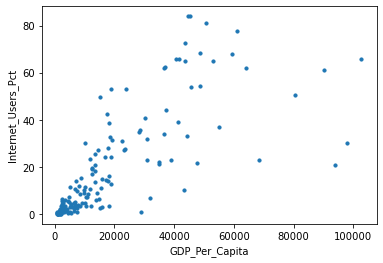

In [61]:
gdp_web_2004.plot.scatter(x = 'GDP_Per_Capita', y = 'Internet_Users_Pct', s = 10)

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

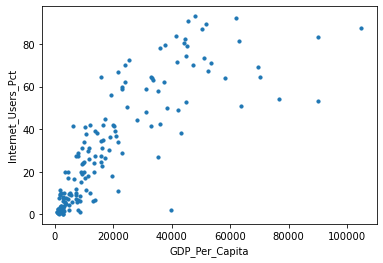

In [62]:
gdp_web_2009.plot.scatter(x = 'GDP_Per_Capita', y = 'Internet_Users_Pct', s = 10)

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

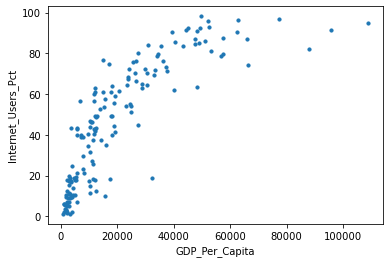

In [63]:
gdp_web_2014.plot.scatter(x = 'GDP_Per_Capita', y = 'Internet_Users_Pct', s = 10)

#22 Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Increasing internet use among richer countries, as well as increasingly more internet use among poorer countries.

#23 Look at the distribution of gdp per capita values for 2014. Is it unimodal?

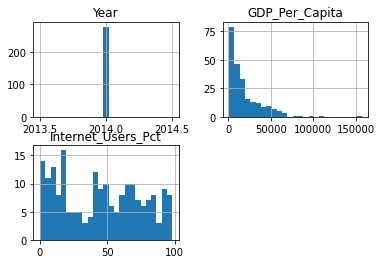

In [64]:
hist_gdp = gdp_web_2014.hist(bins=25)

In [ ]:
#"distribution" means histogram

In [65]:
#values for gdp do not appear as a standard distribution

#24 Look at the distribution of Internet Use for 2014. Is it unimodal?

In [66]:
#per above it does not appear to be unimodal

#25 What are the top 5 countries in terms of internet use in 2014?

In [67]:
gdp_web_2014.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3249,Iceland,2014,49652.149500,98.16
623,Bermuda,2014,77361.104881,96.80
5387,Norway,2014,62589.373548,96.30
1700,Denmark,2014,52214.537753,95.99
99,Andorra,2014,NaN,95.90


In [68]:
#or

In [69]:
internetsort2014 = gdp_web_2014.sort_values(by='Internet_Users_Pct',ascending=False)

In [70]:
internetsort2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3249,Iceland,2014,49652.149500,98.16
623,Bermuda,2014,77361.104881,96.80
5387,Norway,2014,62589.373548,96.30
1700,Denmark,2014,52214.537753,95.99
99,Andorra,2014,NaN,95.90


In [71]:
internetsort2014[['Country','Internet_Users_Pct']].head(5)

,Country,Internet_Users_Pct
3249,Iceland,98.16
623,Bermuda,96.80
5387,Norway,96.30
1700,Denmark,95.99
99,Andorra,95.90


#### 26. Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [80]:
year_subset.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
9,Afghanistan,2009,1758.904043,3.550000
14,Afghanistan,2014,2102.385234,6.390000
34,Albania,2004,7604.838002,2.420388
39,Albania,2009,10346.864199,41.200000


In [82]:
top_5_internet = year_subset[(year_subset["Country"]=='Iceland') | (year_subset["Country"]=='Bermuda') | (year_subset["Country"]=='Norway') | (year_subset["Country"]=='Denmark') | (year_subset["Country"]=='Andorra')]

In [ ]:
# also use .query or create a list

In [85]:
top_5_internet.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
89,Andorra,2004,NaN,26.837954
94,Andorra,2009,NaN,78.530000
99,Andorra,2014,NaN,95.900000
613,Bermuda,2004,90195.811033,60.990867
618,Bermuda,2009,89961.982744,83.250000
623,Bermuda,2014,77361.104881,96.800000
1690,Denmark,2004,50607.628971,80.930000
1695,Denmark,2009,50274.075696,86.840000
1700,Denmark,2014,52214.537753,95.990000
3239,Iceland,2004,45145.545658,83.880000


In [84]:
top_5_internet.shape

(15, 4)

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

 27. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

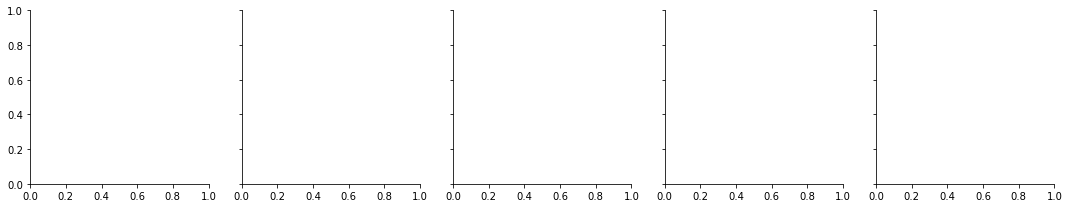

In [117]:
graph1 = sns.FacetGrid(top_5_internet, col ="Country")

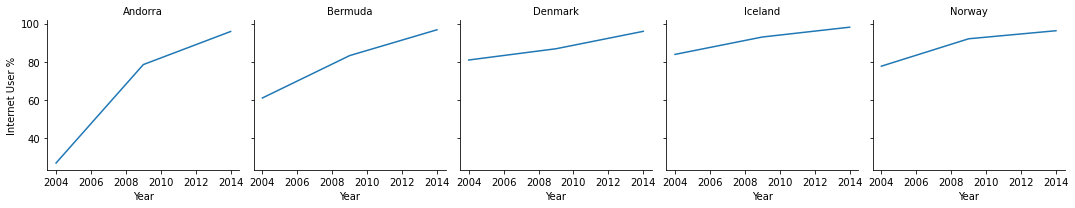

In [118]:
graph1.map(plt.plot, "Year", "Internet_Users_Pct")
graph1.set_axis_labels("Year", "Internet User %")
graph1.set_titles(col_template = "{col_name}");

In [119]:
# very important to have ; at end of last line!!!